# 당뇨 예측 모델 만들기

### 1. 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("diabetes.csv") 

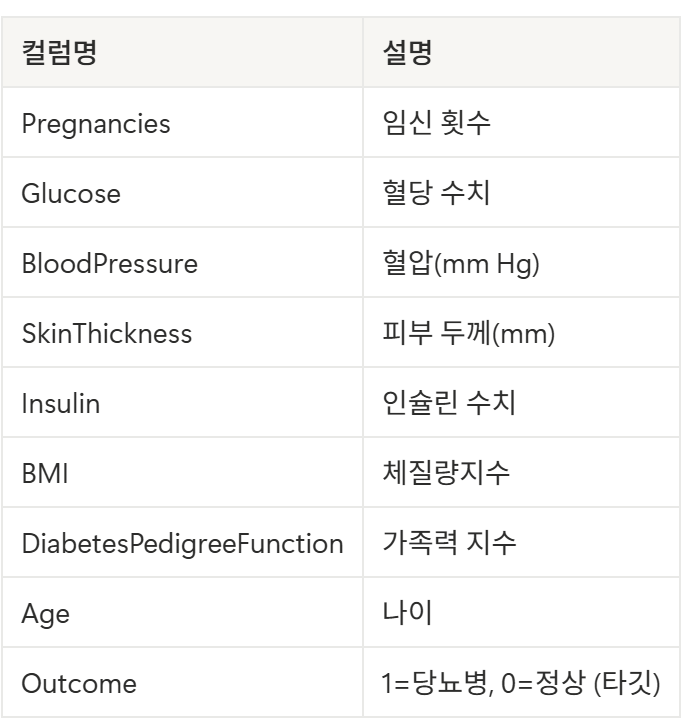

### 2. 탐색적 데이터 분석

In [4]:
print("[행/열 개수]")
print(data.shape)

print("\n[데이터 샘플]")
print(data.head())

print("\n[타겟 데이터 구성]")
print(data['Outcome'].value_counts())

print("\n[결측치 확인]")
print(data.isnull().sum())


[행/열 개수]
(768, 9)

[데이터 샘플]
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

[타겟 데이터 구성]
Outcome
0    500
1    268
Name: count, dtype: int64

[결측치 확인]
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunc

### 3. 데이터 전처리

결측치는 없으나 이상치 확인 됨  
> 0 값을 가질 수 없는 컬럼  
> BloodPressure, SkinThickness, BMI

혈액 검사로 확인 할 수 있는 특성은 제외하기로 함 
> Glucose, Insulin

In [5]:
# Insulin 수치 제외
data = data.drop(columns=('Insulin'))

# target 값 분리
target = data.pop('Outcome')


# train/test 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

# 확인
print("train_input 데이터셋: ",train_input.shape)
print("test_input 데이터셋: ",test_input.shape)
print("train_target 데이터셋: ",train_target.shape)
print("test_target 데이터셋: ",test_target.shape)

# 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    train_input, train_target, test_size=0.25, random_state=42)

train_input 데이터셋:  (614, 7)
test_input 데이터셋:  (154, 7)
train_target 데이터셋:  (614,)
test_target 데이터셋:  (154,)


In [6]:

# [이상치 처리]
zero_cols = ['BloodPressure', 'SkinThickness','BMI', 'Glucose']

# # <중앙값 대체(0제외)>
# for col in zero_cols:
#     median = X_train[X_train[col] != 0][col].median()  # 0 제외한 값으로 중앙값 계산
#     X_train.loc[X_train[col] == 0, col] = median
#     X_val.loc[X_val[col] == 0, col] = median
#     test_input.loc[test_input[col] == 0, col] = median


# # <평균값 대체(0제외)>
# for col in zero_cols:
#     mean = X_train[X_train[col] != 0][col].mean()  # 0 제외한 값으로 평균값 계산
#     X_train.loc[X_train[col] == 0, col] = mean
#     X_val.loc[X_val[col] == 0, col] = mean
#     test_input.loc[test_input[col] == 0, col] = mean


# <행 삭제>
# train
X_train.replace(0, np.nan, inplace=True)
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

# validation
X_val.replace(0, np.nan, inplace=True)
X_val.dropna(inplace=True)
y_val = y_val.loc[X_val.index]

# test
X_test = test_input.copy()
X_test.replace(0, np.nan, inplace=True)
X_test.dropna(inplace=True)
y_test = test_target.loc[X_test.index]



In [7]:
# [스케일링]

# # <민맥스 스케일링>
# from sklearn.preprocessing import MinMaxScaler
# minmax_scaler = MinMaxScaler()
# X_train[:] = minmax_scaler.fit_transform(X_train) # 데이터 프레임 구조 유지하기 위해 슬라이싱 사용
# X_val[:] = minmax_scaler.transform(X_val)
# X_test[:] = minmax_scaler.transform(X_test)

# <스탠더드 스케일링>
from sklearn.preprocessing import StandardScaler 
std_scaler = StandardScaler()
X_train[:] = std_scaler.fit_transform(X_train)
X_val[:] = std_scaler.transform(X_val)
X_test[:] = std_scaler.transform(X_test)


/tmp/ipykernel_789/2162131542.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.62406236  0.192616   -0.44257828 -0.53332032 -1.07777256 -0.53332032
 -0.17035216 -0.62406236 -0.80554644 -0.98703052  0.82781029  0.28335804
 -0.80554644  1.64448865  0.10187396 -0.89628848 -0.2610942  -0.89628848
  1.10003641  0.73706825 -0.89628848 -0.62406236  1.46300457 -0.2610942
  1.82597273  1.37226253  0.73706825 -0.80554644 -0.80554644 -1.07777256
 -1.07777256  1.46300457 -0.17035216 -0.89628848 -1.07777256 -0.7148044
 -1.07777256  1.10003641 -0.80554644  1.64448865  1.19077845 -0.80554644
 -0.98703052 -0.44257828 -0.7148044  -0.53332032  1.28152049 -0.98703052
 -0.2610942  -0.7148044   1.73523069  1.55374661 -0.7148044   0.28335804
 -0.35183624  1.73523069 -1.07777256  1.19077845 -0.98703052 -0.7148044
 -0.2610942  -0.2610942  -0.44257828  0.73706825 -0.17035216  0.28335804
  1.55374661 -0.53332032  0.37410009 -0.17035

### 4. 모델 학습

랜덤서치 최적 파라미터: {'bootstrap': False, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 369}
랜덤서치 최고 AUC: 0.8368486029889539
그리드서치 최적 파라미터: {'bootstrap': False, 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 369}
그리드서치 최고 AUC: 0.8377745289148798


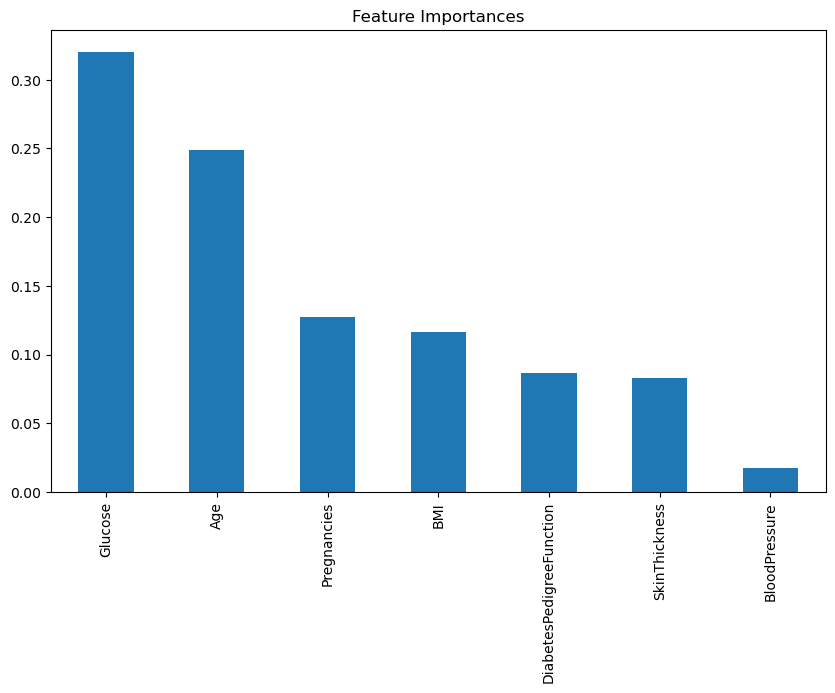

In [8]:
# # 랜덤포레스트(여러 개의 의사결정 나무를 기반으로 한 앙상블 학습 알고리즘)
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(random_state=42)
# rf.fit(X_train, y_train)
# pred_proba = rf.predict_proba(X_val)[:, 1]


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

# 랜덤서치용 파라미터 분포
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# 랜덤서치
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,        # 50개의 랜덤 조합 시도
    cv=5,             # 5-fold 교차검증
    scoring='roc_auc',# 평가 지표
    n_jobs=-1,        # CPU 코어 모두 사용
    random_state=42
)
random_search.fit(X_train, y_train)

print("랜덤서치 최적 파라미터:", random_search.best_params_)
print("랜덤서치 최고 AUC:", random_search.best_score_)

# 랜덤서치 결과 기반 그리드서치 세밀 튜닝
best_params = random_search.best_params_
param_grid = {
    'n_estimators': [best_params['n_estimators']-100, best_params['n_estimators'], best_params['n_estimators']+100],
    'max_depth': [best_params['max_depth']-2, best_params['max_depth'], best_params['max_depth']+2],
    'min_samples_split': [max(2, best_params['min_samples_split']-1), best_params['min_samples_split'], best_params['min_samples_split']+1],
    'min_samples_leaf': [best_params['min_samples_leaf'], best_params['min_samples_leaf']+1],
    'max_features': [best_params['max_features']],
    'bootstrap': [best_params['bootstrap']]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("그리드서치 최적 파라미터:", grid_search.best_params_)
print("그리드서치 최고 AUC:", grid_search.best_score_)

# 최종 모델로 검증셋 예측
pred_proba = grid_search.predict_proba(X_val)[:, 1]

# 중요도 시각화
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title("Feature Importances")
plt.show()



In [11]:
# 검증데이터 평가(roc-auc) : 이진 분류에서 추천되는 파라미터
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val, pred_proba)
print('roc_auc:', roc_auc)

roc_auc: 0.8352040816326531


In [12]:
# # 테스트데이터 평가(roc-auc)
# test_pred_proba = rf.predict_proba(X_test)[:, 1]
# test_roc_auc = roc_auc_score(y_test, test_pred_proba)
# print("Test ROC-AUC:", test_roc_auc)



# # 하이퍼 파라미터 튜닝 모델 테스트데이터 평가(roc-auc)
test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, test_pred_proba)
print("Test ROC-AUC:", test_roc_auc)

Test ROC-AUC: 0.822863610639502


/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/user15/anaconda3/envs/ai-study/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


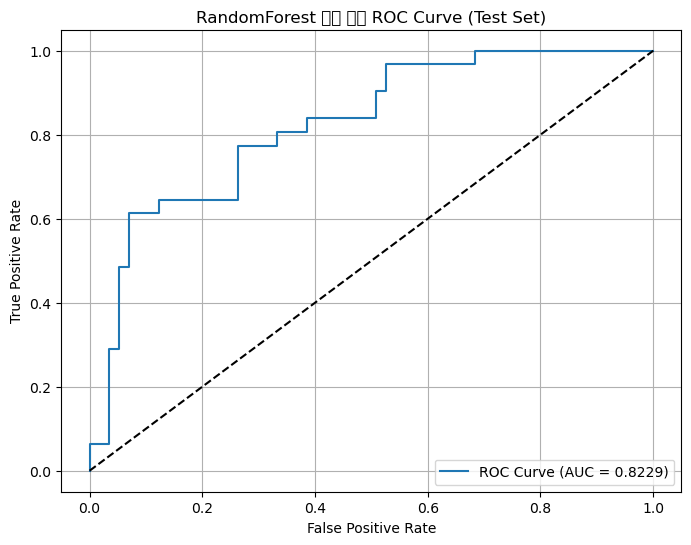

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {test_roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--')  # 기준선

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RandomForest 최종 모델 ROC Curve (Test Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#### <이상치 처리>  

[1번]   
 모델: 랜덤포레스트   
 roc_auc: 0.8168  

[2번]   
 이상치(0): 중앙값 대체   
 모델: 랜덤포레스트   
 roc_auc: 0.7868  

[3번]   
 이상치(0): 평균값 대체   
 모델: 랜덤포레스트   
 roc_auc: 0.7801  

[4번]   
 이상치(0): 삭제   
 모델: 랜덤포레스트   
 roc_auc: 0.8416  
  
> 이상치 삭제가 성능 제일 좋음  

#### <표준화 시도>  

[1번]   
 이상치(0): 삭제   
 표준화: 민맥스 스케일링   
 모델: 랜덤포레스트   
 roc_auc: 0.8436  

[2번]   
 이상치(0): 삭제   
 표준화: 스탠더드 스케일링   
 모델: 랜덤포레스트   
 roc_auc: 0.8441  

> 스탠더드 스케일링으로 결정  

#### <평가>
[랜덤포레스트 모델]  
검증 roc_auc: 0.8441326530612244  
테스트 roc_auc: 0.8064516129032258  

[랜덤포레스트 하이퍼파라미터 튜닝모델]  
검증 roc_auc: 0.8352040816326531  
테스트 roc_auc: 0.822863610639502 

[성능 향상을 위한 하이퍼파라미터 튜닝 방법]    
1. Grid Search (모든 조합 시도)  
2. Randomized Search (무작위 샘플링)  

<GPT 추천>  
- 처음엔 RandomizedSearchCV로 대략적인 범위 찾기
- 그 후 GridSearchCV로 세밀하게 최적화

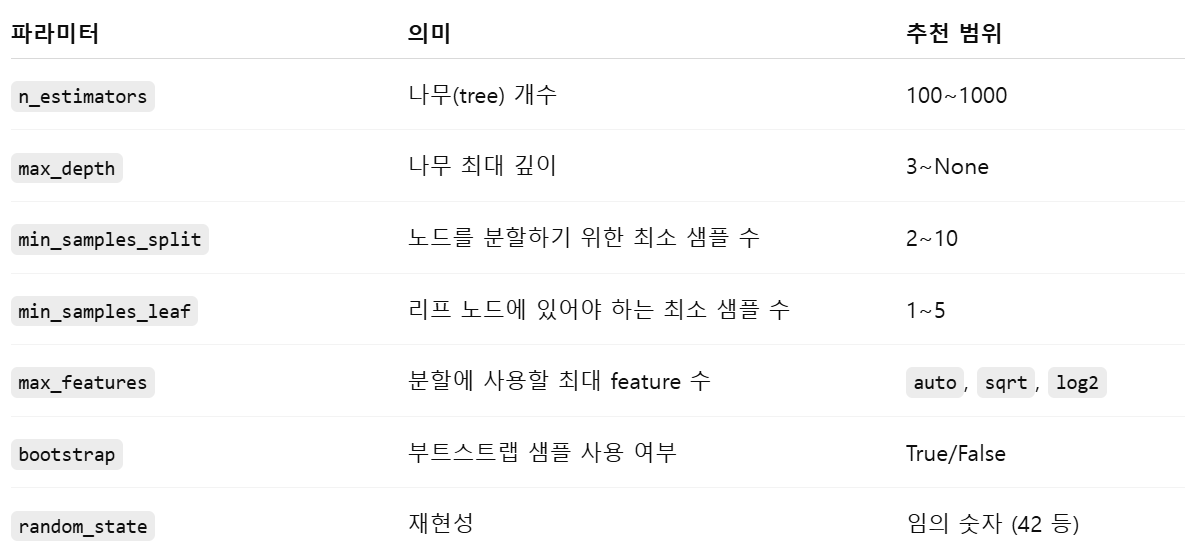
